# **Importing necessary libraires**

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")
from time import gmtime, strftime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### **Reading Dataset**

In [3]:
data = pd.read_csv("car data.csv",parse_dates=["Year"])

In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014-01-01,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013-01-01,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017-01-01,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011-01-01,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014-01-01,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_Name       301 non-null    object        
 1   Year           301 non-null    datetime64[ns]
 2   Selling_Price  301 non-null    float64       
 3   Present_Price  301 non-null    float64       
 4   Driven_kms     301 non-null    int64         
 5   Fuel_Type      301 non-null    object        
 6   Selling_type   301 non-null    object        
 7   Transmission   301 non-null    object        
 8   Owner          301 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 21.3+ KB


In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301,301.000000,301.000000,301.000000,301.000000
mean,2013-08-17 22:53:01.395348736,4.661296,7.628472,36947.205980,0.043189
min,2003-01-01 00:00:00,0.100000,0.320000,500.000000,0.000000
25%,2012-01-01 00:00:00,0.900000,1.200000,15000.000000,0.000000
50%,2014-01-01 00:00:00,3.600000,6.400000,32000.000000,0.000000
75%,2016-01-01 00:00:00,6.000000,9.900000,48767.000000,0.000000
max,2018-01-01 00:00:00,35.000000,92.600000,500000.000000,3.000000
std,NaN,5.082812,8.642584,38886.883882,0.247915


In [7]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
print("Total unique cars : ",data["Car_Name"].nunique())
print("Total unique fuel types : ",data["Fuel_Type"].nunique())
print("Total unique Owner types : ",data["Owner"].nunique())
print("Total unique selling types : ",data["Selling_type"].nunique())
print("Total unique transmission : ",data["Transmission"].nunique())

Total unique cars :  98
Total unique fuel types :  3
Total unique Owner types :  3
Total unique selling types :  2
Total unique transmission :  2


In [9]:
print("Total unique fuel types :\n",data["Fuel_Type"].value_counts())
print("\nTotal unique Owner types :\n",data["Owner"].value_counts())
print("\nTotal unique selling types :\n",data["Selling_type"].value_counts())
print("\nTotal unique transmission :\n",data["Transmission"].value_counts())

Total unique fuel types :
 Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

Total unique Owner types :
 Owner
0    290
1     10
3      1
Name: count, dtype: int64

Total unique selling types :
 Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

Total unique transmission :
 Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


## **Exploratory Data Analysis**

In [14]:
copy_data = data.copy()

#### **Univariate Analysis**

<Axes: xlabel='Selling_Price', ylabel='Count'>

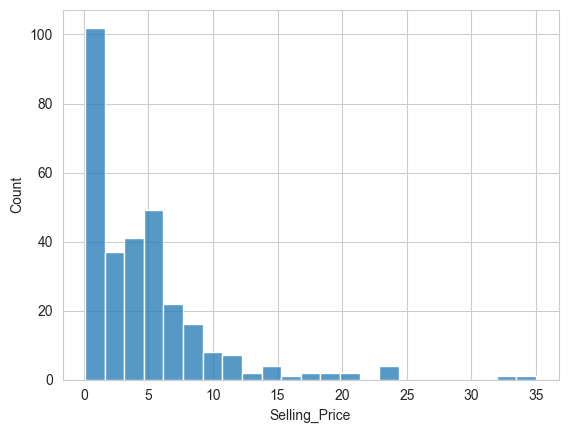

In [40]:
sns.histplot(data=copy_data,x="Selling_Price")

<Axes: xlabel='Present_Price', ylabel='Count'>

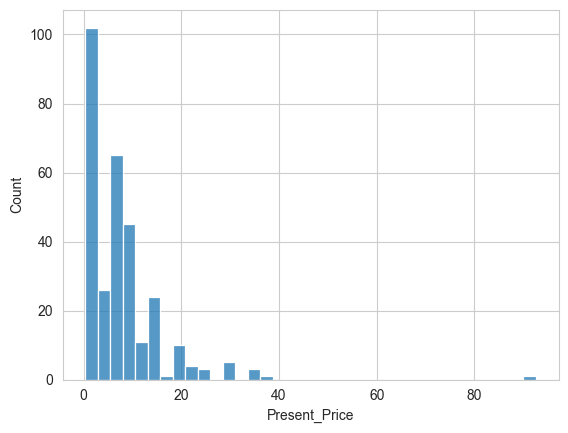

In [44]:
sns.histplot(data=copy_data,x="Present_Price")

<Axes: xlabel='Driven_kms', ylabel='Count'>

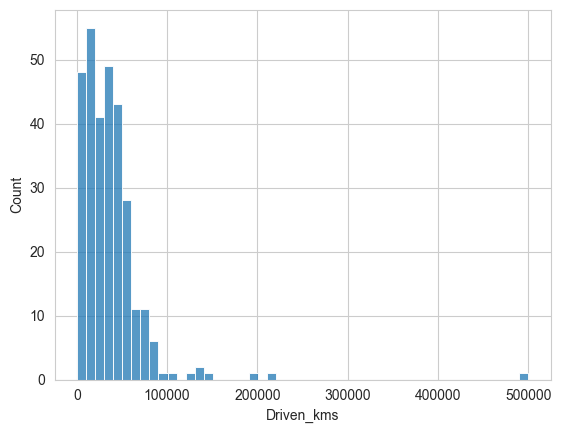

In [75]:
sns.histplot(data=copy_data,x=copy_data["Driven_kms"])

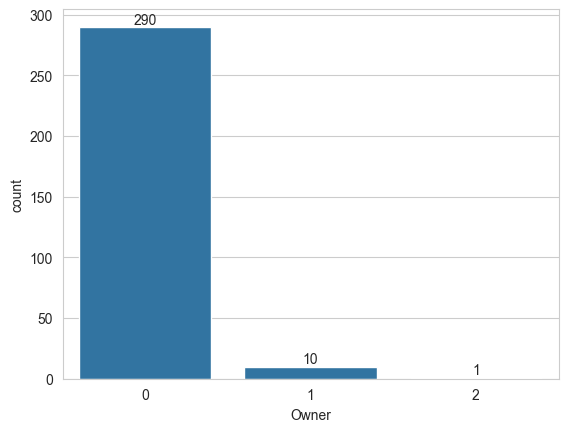

In [86]:
bar = sns.countplot(data=copy_data,x="Owner")
for bars in bar.containers:
    bar.bar_label(bars)

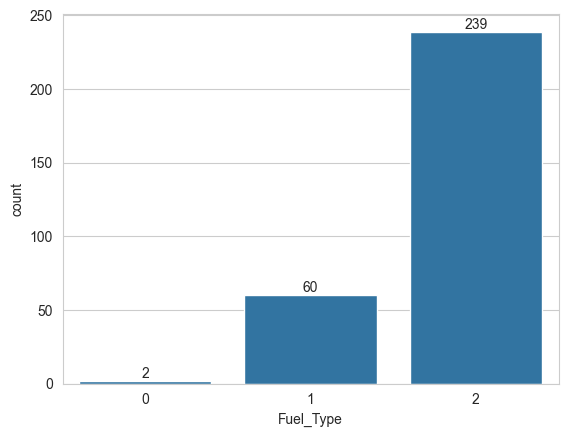

In [62]:
bar = sns.countplot(data=copy_data,x="Fuel_Type")
for bars in bar.containers:
    bar.bar_label(bars)

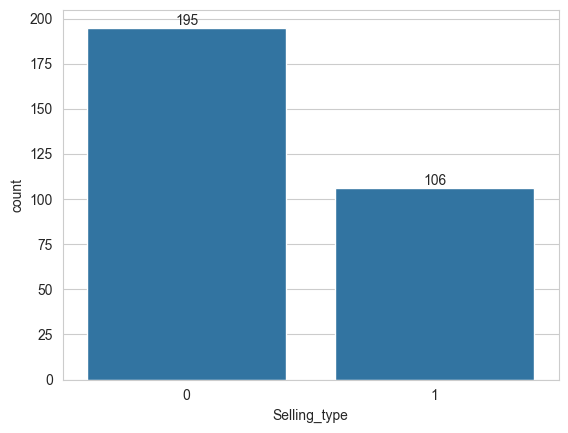

In [83]:
bar = sns.countplot(data=copy_data,x="Selling_type")
for bars in bar.containers:
    bar.bar_label(bars)

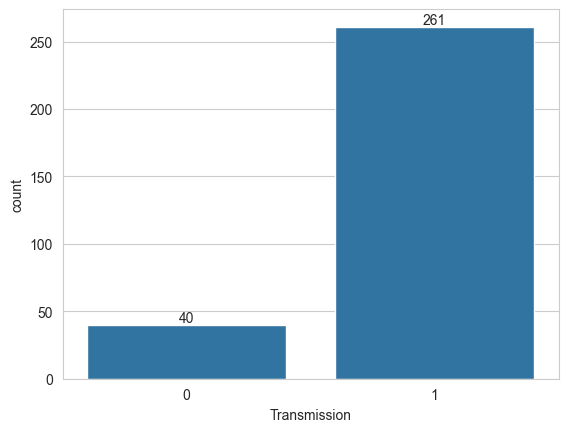

In [84]:
bar = sns.countplot(data=copy_data,x="Transmission")
for bars in bar.containers:
    bar.bar_label(bars)

#### **Bivariate Analysis**

<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

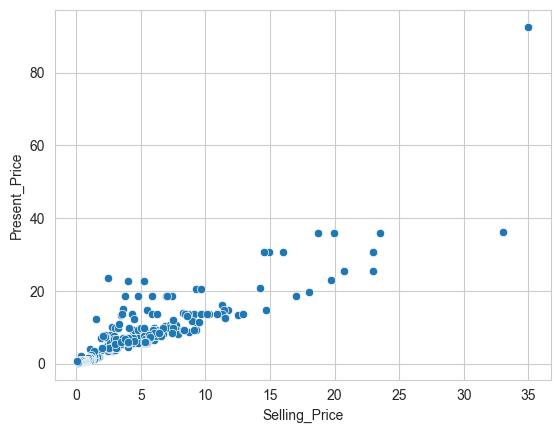

In [46]:
sns.scatterplot(data=copy_data,x="Selling_Price",y="Present_Price")

<Axes: xlabel='Selling_Price', ylabel='Driven_kms'>

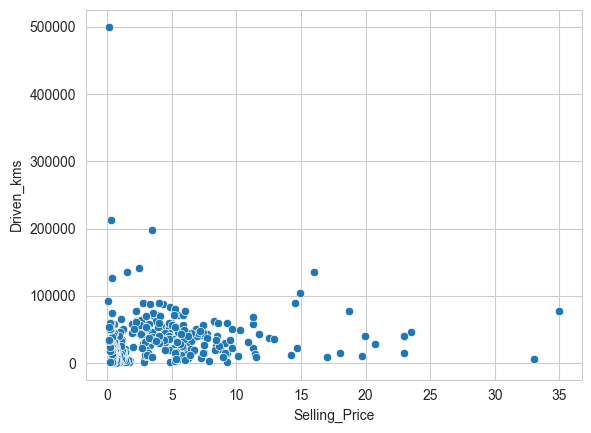

In [48]:
sns.scatterplot(data=copy_data,x="Selling_Price",y="Driven_kms")

<Axes: xlabel='Present_Price', ylabel='Driven_kms'>

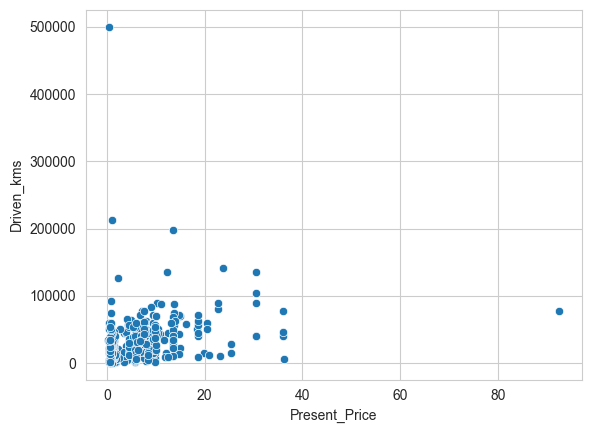

In [49]:
sns.scatterplot(data=copy_data,x="Present_Price",y="Driven_kms")

<Axes: xlabel='Selling_Price', ylabel='Year'>

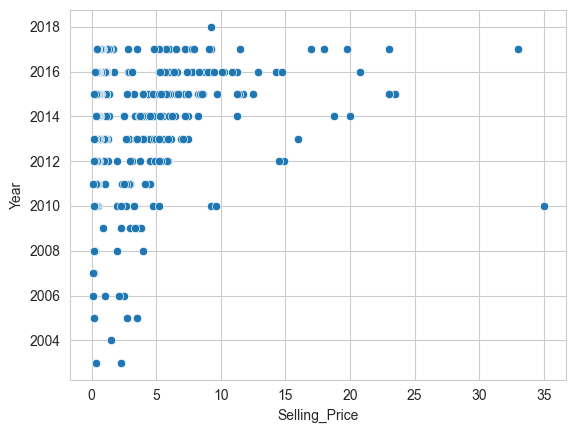

In [94]:
sns.scatterplot(data=copy_data,x="Selling_Price",y="Year")

<Axes: xlabel='Present_Price', ylabel='Year'>

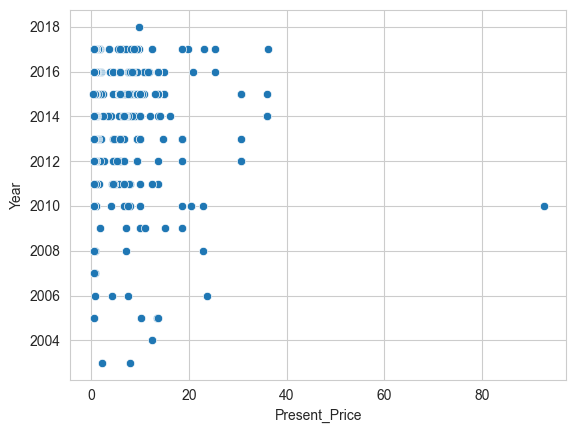

In [93]:
sns.scatterplot(data=copy_data,x="Present_Price",y="Year")

<Axes: xlabel='Year', ylabel='Driven_kms'>

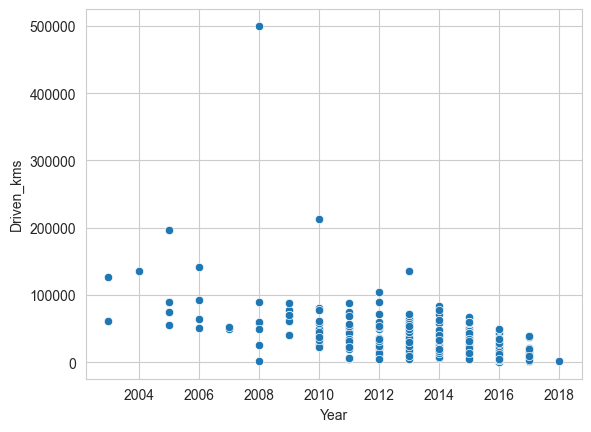

In [96]:
sns.scatterplot(data=copy_data,x="Year",y="Driven_kms")

#### **Checking for Z-score**

In [98]:
copy_data["Selling_Price_zscore"] = zscore(copy_data["Selling_Price"])
copy_data["Present_Price_zscore"] = zscore(copy_data["Present_Price"])
copy_data["Driven_kms_zscore"] = zscore(copy_data["Driven_kms"])

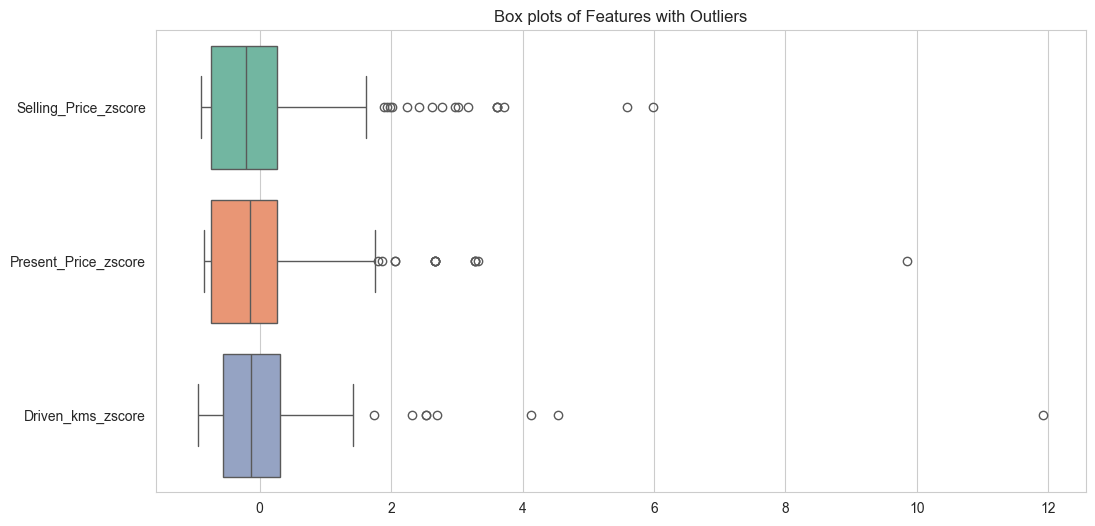

In [99]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=copy_data[['Selling_Price_zscore', 'Present_Price_zscore', 'Driven_kms_zscore']], orient="h", palette="Set2")
plt.title("Box plots of Features with Outliers")
plt.show()

In [ ]:
# Q1 = copy_data["Selling_Price"].quantile(0.25)
# Q3 = copy_data["Present_Price"].quantile(0.75)
# IQR = Q3 - Q1

# # Identify outliers
# outliers = ((copy_data[numerical_features] < (Q1 - 1.5 * IQR)) | (copy_data[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)

In [15]:
def encode_categorical_column(df, column_name):

    le = LabelEncoder()
    label = le.fit_transform(df[column_name])
    df.drop(column_name, axis=1, inplace=True)
    df[column_name] = label
    return df

In [16]:
encode_categorical_column(df=copy_data, column_name="Selling_type")
encode_categorical_column(df=copy_data, column_name="Fuel_Type")
encode_categorical_column(df=copy_data, column_name="Transmission")
encode_categorical_column(df=copy_data, column_name="Owner")
encode_categorical_column(df=copy_data, column_name="Car_Name")


,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Fuel_Type,Transmission,Owner,Car_Name
0,2014-01-01,3.35,5.59,27000,0,2,1,0,90
1,2013-01-01,4.75,9.54,43000,0,1,1,0,93
2,2017-01-01,7.25,9.85,6900,0,2,1,0,68
3,2011-01-01,2.85,4.15,5200,0,2,1,0,96
4,2014-01-01,4.60,6.87,42450,0,1,1,0,92
...,...,...,...,...,...,...,...,...,...
296,2016-01-01,9.50,11.60,33988,0,1,1,0,69
297,2015-01-01,4.00,5.90,60000,0,2,1,0,66
298,2009-01-01,3.35,11.00,87934,0,2,1,0,69
299,2017-01-01,11.50,12.50,9000,0,1,1,0,69


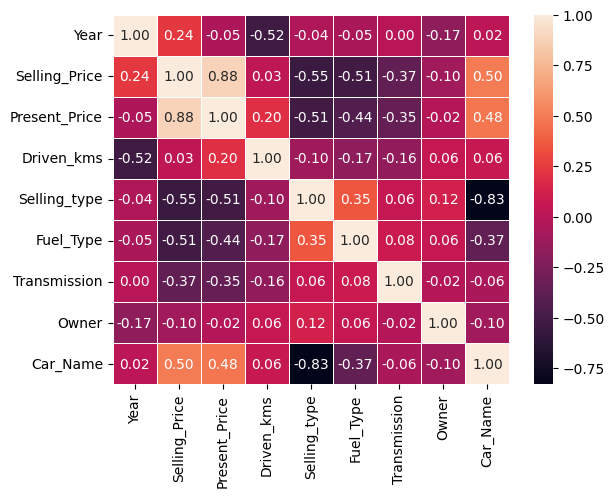

In [17]:
corr = copy_data.corr()
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

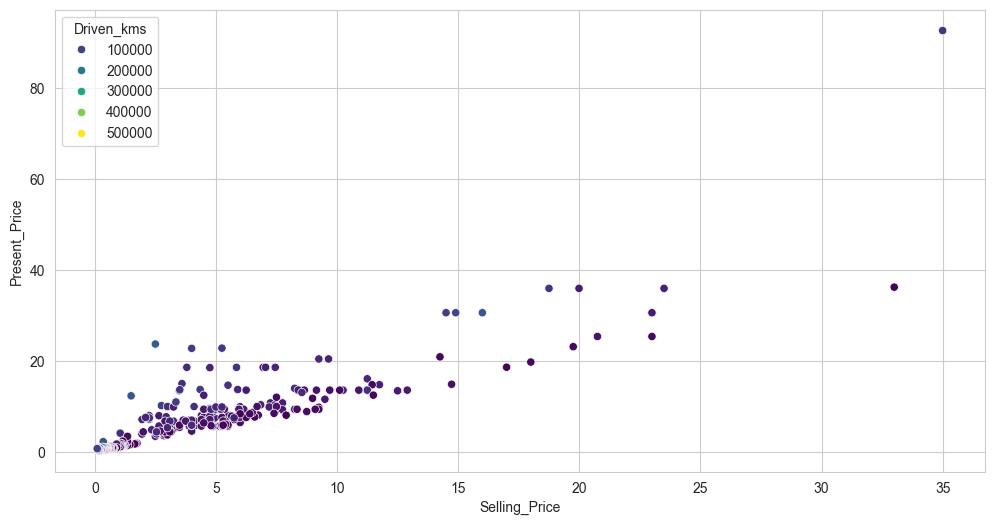

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.scatterplot(copy_data,x= "Selling_Price", y = "Present_Price",hue="Driven_kms",palette="viridis")

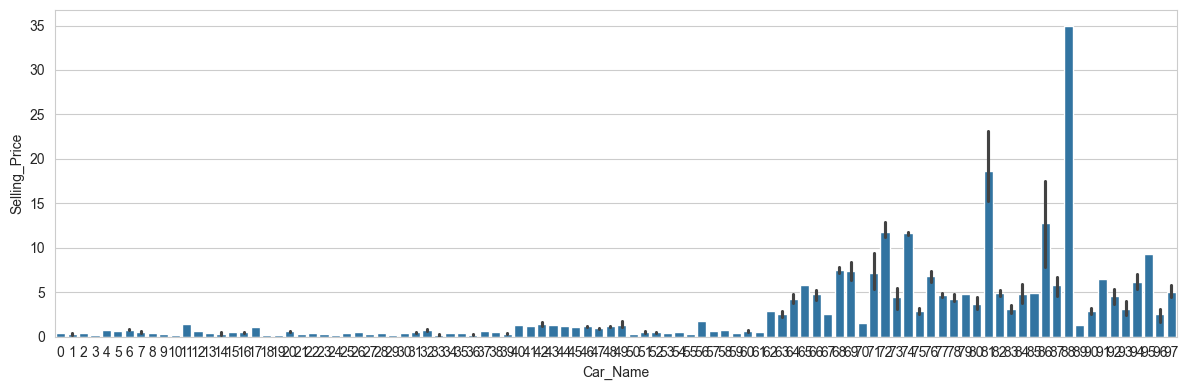

In [27]:
plt.figure(figsize=(12,4))
sns.barplot(data=copy_data,y = "Selling_Price",x="Car_Name")
plt.tight_layout()

## **Creating new features**

In [15]:
# data['How_old'] = pd.Timestamp.now().normalize() - data['Year']

In [16]:
# data["Price_Diffrence"] = data["Present_Price"] - data["Selling_Price"]

In [17]:
# data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Fuel_Type,Transmission,Owner,Car_Name,How_old,Price_Diffrence
0,2014-01-01,3.35,5.59,27000,0,2,1,0,90,3819 days,2.24
1,2013-01-01,4.75,9.54,43000,0,1,1,0,93,4184 days,4.79
2,2017-01-01,7.25,9.85,6900,0,2,1,0,68,2723 days,2.60
3,2011-01-01,2.85,4.15,5200,0,2,1,0,96,4915 days,1.30
4,2014-01-01,4.60,6.87,42450,0,1,1,0,92,3819 days,2.27


# **Machine Learning Models**

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
X = data.drop("Present_Price",axis=1)
y = data["Present_Price"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

## **Preprocessing**

In [55]:
numerical_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=["object"]).columns

In [60]:
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))   
])

In [61]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer,numerical_features),
        ('cat',categorical_transformer,categorical_features)
    ]
)

### **Linear Regression Model**

In [62]:
from sklearn.linear_model import LinearRegression

lr_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',LinearRegression())
])

lr_pipeline.fit(X_train,y_train)
y_pred_lr = lr_pipeline.predict(X_test)

In [63]:
print("Liner Regression :\n")
print("MAE :",mean_absolute_error(y_test,y_pred_lr).round(2))
print("MSE :",mean_squared_error(y_test,y_pred_lr).round(2))
print("R2 Score :",r2_score(y_test,y_pred_lr)*100)

Liner Regression :

MAE : 1.34
MSE : 3.63
R2 Score : 92.80411058313905


### **Random Forest Regressor**

In [64]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor(random_state=42))
])

rf_pipeline.fit(X_train,y_train)
y_pred_rf = rf_pipeline.predict(X_test)

In [65]:
print("Random Forest Regressor :\n")
print("MAE :",mean_absolute_error(y_test,y_pred_rf).round(2))
print("MSE :",mean_squared_error(y_test,y_pred_rf).round(2))
print("R2 Score :",r2_score(y_test,y_pred_rf)*100)

Random Forest Regressor :

MAE : 1.51
MSE : 6.89
R2 Score : 86.33342287902117


### **XGBoost Regressor**

In [66]:
from xgboost import XGBRegressor

xgb_model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',XGBRegressor())
])

xgb_model.fit(X_train,y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [67]:
print("XGBoost Regressor :\n")
print("MAE :",mean_absolute_error(y_test,y_pred_xgb).round(2))
print("MSE :",mean_squared_error(y_test,y_pred_xgb).round(2))
print("R2 Score :",r2_score(y_test,y_pred_xgb)*100)

XGBoost Regressor :

MAE : 1.28
MSE : 4.8
R2 Score : 90.47449477179356


In [68]:
models = ['Linear Regression', 'Random Forest', 'XGBoost']
mae_scores = [mean_absolute_error(y_test, y_pred_lr).round(2), mean_absolute_error(y_test, y_pred_rf).round(2), mean_absolute_error(y_test, y_pred_xgb).round(2)]
mse_scores = [mean_squared_error(y_test, y_pred_lr).round(2), mean_squared_error(y_test, y_pred_rf).round(2), mean_squared_error(y_test, y_pred_xgb).round(2)]
r2_scores = [r2_score(y_test, y_pred_lr)*100, r2_score(y_test, y_pred_rf)*100, r2_score(y_test, y_pred_xgb)*100]

for i in range(len(models)):
    print(f"{models[i]} - MAE: {mae_scores[i]}, MSE: {mse_scores[i]}, R2 Score: {r2_scores[i]}")


Linear Regression - MAE: 1.34, MSE: 3.63, R2 Score: 92.80411058313905
Random Forest - MAE: 1.51, MSE: 6.89, R2 Score: 86.33342287902117
XGBoost - MAE: 1.28, MSE: 4.8, R2 Score: 90.47449477179356


### **Hyper Tuning For XGBoost**

In [71]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.3],
    'model__subsample': [0.8, 1.0]
}

In [72]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

In [73]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Selling_Price', 'Driven_kms', 'Owner'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder...
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1, 0.3],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [50, 100, 200],
                         'model__subsample': [0.8, 1.0]},
             scoring='r2', verbose=1)

In [74]:
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

Best Parameters: {'model__learning_rate': 0.3, 'model__max_depth': 7, 'model__n_estimators': 50, 'model__subsample': 0.8}
Best R2 Score: 0.8164914084171023


In [75]:
best_xgb_model = grid_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

In [77]:
print('Tuned XGBoost:')
print('MAE:', mean_absolute_error(y_test, y_pred_best_xgb).round(2))
print('MSE:', mean_squared_error(y_test, y_pred_best_xgb).round(2))
print('R2 Score:', r2_score(y_test, y_pred_best_xgb)*100)

Tuned XGBoost:
MAE: 1.27
MSE: 4.6
R2 Score: 90.87389228282056


In [78]:
import joblib

# Save the trained pipeline
joblib.dump(best_xgb_model, 'tuned_xgb_model.pkl')

# Load the model for prediction
loaded_model = joblib.load('tuned_xgb_model.pkl')